# 붓꽃 판별

## 패키지 로딩

In [1]:
!pip install seaborn --upgrade

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
   -------------------------- ------------- 194.6/294.9 kB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [19]:
import numpy as np
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix, classification_report, roc_auc_score

## 데이터 로드 및 확인

In [4]:
iris = load_iris()
x = iris.data
y = iris.target
#print(x.shape)

## 학습 데이터/평가 데이터 분리

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=10, stratify=y ) # stratify=y를 사용하여 데이터를 분할하면, 훈련 세트와 테스트 세트 모두에 클래스 A와 클래스 B가 유사한 비율로 포함됩니다. 즉, 훈련 세트와 테스트 세트에 있는 클래스 A와 클래스 B의 비율은 원래 데이터셋과 유사하게 유지
print('y의 클래스별 데이터:', np.bincount(y))
print('y의 클래스별 데이터:', np.bincount(y_train))
print('y의 클래스별 데이터:', np.bincount(y_test))

y의 클래스별 데이터: [50 50 50]
y의 클래스별 데이터: [40 40 40]
y의 클래스별 데이터: [10 10 10]


## 모델생성
- multi-class : 다중분류 문제를 처리하기 위한 방식을 지정
  >- solver 가 liblinear로 지정된 경우 OVR(OneVSRest) 방식으로 제한된다.
- 

In [6]:
model = LogisticRegression(solver='liblinear',multi_class='ovr',max_iter=2000)
model.fit(x_train, y_train)# max iter 반복하는 최대 횟수를 제한, 무한루트 빠지지 않도록

LogisticRegression(max_iter=2000, multi_class='ovr', solver='liblinear')

## 모델예측

In [7]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [8]:
y_hat = model.predict(x_test)
print(y_hat[:5])

[1 0 2 2 1]


In [9]:
prob = model.predict_proba(x_test)
print(np.round(prob[:5],3))

[[0.015 0.548 0.437]
 [0.902 0.097 0.   ]
 [0.014 0.348 0.638]
 [0.005 0.395 0.601]
 [0.129 0.723 0.149]]


## 모델평가
- 다중 클래스의 분류의 경우 average 속성에 집계방식 (macro, micro, weight ) 지정해야함

In [10]:
print(f'정확도:{accuracy_score(y_test,y_hat):.3f}')
print(f'정밀도:{precision_score(y_test,y_hat,average="macro"):.3f}')
print(f'F1-SCORE:{f1_score(y_test,y_hat,average="macro"):.3f}')

정확도:0.967
정밀도:0.970
F1-SCORE:0.967


- 다중 클래스 분류의 ROC
 >- ROC곡선은 일반적으로 TPR과 FPR을 명확하게 정의할 수 있는 이진분류에 사용된다.
 >- 다중클래스 분류의 경우 출력을 이진화 하고 TPR과 FPR의 값을 얻을 수 있다.
 >- One Vs Rest One Vs One 방법으로 수행 할 수 있다.

In [11]:
auc = roc_auc_score(y_test, model.predict_proba(x_test),multi_class='ovr')
print(f'AUC:{auc:.3f}')

AUC:0.988


In [12]:
report = classification_report(y_test,y_hat)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## 다중 클래스 혼동행렬 시각화

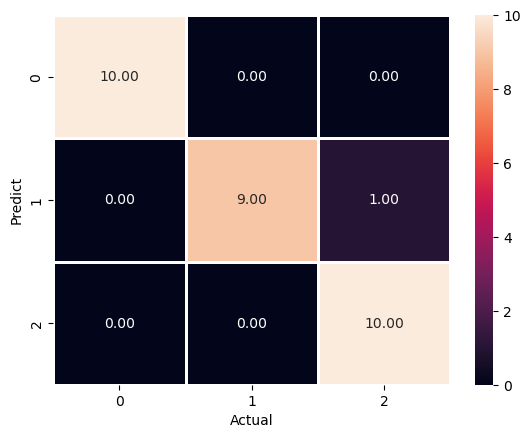

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test,y_hat), annot=True, fmt=".2f", linewidths=1)

plt.xlabel('Actual')
plt.ylabel('Predict')
plt.show()

## 하이퍼 파라메터 튜닝

In [22]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()
params = {
    'C': [0.01,0.1,1,3,5,10],
    'solver':['newton-cg','lbfgs','sag','saga','liblinear'],
    'multi_class':['ovr','multinomial']
}
gs = GridSearchCV(model,params,cv=5,scoring='accuracy',n_jobs=-1)
#GridSearch는 머신러닝 모델에서 최적의 하이퍼파라미터를 찾기 위한 기법 중 하나입니다. 하이퍼파라미터는 모델 학습 과정에서 사용자가 직접 지정해야 하는 매개변수로, 모델의 성능에 큰 영향을 미칩니다.
gs.fit(x,y)
print('최적 파라메터:', gs.best_params_)
print('최적 정확도:', gs.best_score_)

최적 파라메터: {'C': 1, 'multi_class': 'multinomial', 'solver': 'saga'}
최적 정확도: 0.9866666666666667


C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1207, in fit
    multi_class = _check_multi_class(self.multi_class, solver, len(self.classes_))
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-

## 최적 파라메터를 이용한 모델평가

In [25]:
y_hat = gs.best_estimator_.predict(x_test)
print(f'정확도:{accuracy_score(y_test,y_hat):.3f}')
auc = roc_auc_score(y_test,gs.best_estimator_.predict_proba(x_test),multi_class='ovr')
print('AUC:',auc)

정확도:1.000
AUC: 1.0
